In [81]:
#Importing the dataset in python 
import pandas as pd
#df = pd.read_excel(r'D:\python\HospitalDatabase.xlsx')
Datafilepath = 'D:\python\HospitalDatabase.xlsx'
xl = pd.ExcelFile(Datafilepath)
sheets = xl.sheet_names
for i, sheet in enumerate(sheets):
    globals()['df'+ str(i+1)] = pd.read_excel(Datafilepath, sheet_name = sheet)
    print(globals()['df'+ str(i+1)])

     PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  
0                     White  English  
1                     White  English  
2                     White  English  
3              

     EDVisitID  PatientID               VisitDate         EDDischargeTime  \
0            1          1 2020-01-01 00:00:00.000 2020-01-01 11:20:22.924   
1           12         12 2020-01-01 02:45:40.302 2020-01-02 02:00:00.517   
2           13         13 2020-01-01 03:09:24.701 2020-01-01 05:00:20.852   
3           14         14 2020-01-01 03:12:19.349 2020-01-01 04:32:29.142   
4           15         15 2020-01-01 03:46:32.698 2020-01-01 06:24:52.741   
..         ...        ...                     ...                     ...   
940       1183        929 2020-01-15 10:38:42.570 2020-01-16 02:31:52.023   
941       1186        932 2020-01-15 11:52:37.540 2020-01-16 10:19:41.570   
942       1187        933 2020-01-15 12:11:11.678 2020-01-15 16:41:15.223   
943       1188        934 2020-01-15 12:21:46.006 2020-01-15 18:32:21.060   
944       1189        935 2020-01-15 12:51:14.875 2020-01-15 23:40:41.456   

     Acuity ReasonForVisit EDDisposition  
0         1   Stomach Ache      

In [67]:
#1.Calculate the time spent in ED Department for each visit.
#-----------------------------------------------------------
df=df2
df['Time']=df["EDDischargeTime"]-df["VisitDate"]
df[['EDVisitID','Time']]

,EDVisitID,Time
0,1,0 days 11:20:22.924000
1,12,0 days 23:14:20.215000
2,13,0 days 01:50:56.151000
3,14,0 days 01:20:09.793000
4,15,0 days 02:38:20.043000
...,...,...
1194,1183,0 days 15:53:09.453000
1195,1186,0 days 22:27:04.030000
1196,1187,0 days 04:30:03.545000
1197,1188,0 days 06:10:35.054000


In [74]:
#2.Get the  number of patients based on service and primary diagnosis.
#--------------------------------------------------------------------
df4.groupby(["Service","PrimaryDiagnosis"])["PatientID"].count().reset_index(name='Patient count')

,Service,PrimaryDiagnosis,Patient count
0,Cardiology,AMI,40
1,Cardiology,Afib,10
2,Cardiology,Broken Leg,3
3,Cardiology,Flu,2
4,Cardiology,Heart Failure,39
5,Cardiology,Kidney Failure,1
6,General Medicine,Broken Leg,3
7,General Medicine,Diabetes,38
8,General Medicine,Fever,13
9,General Medicine,Flu,54


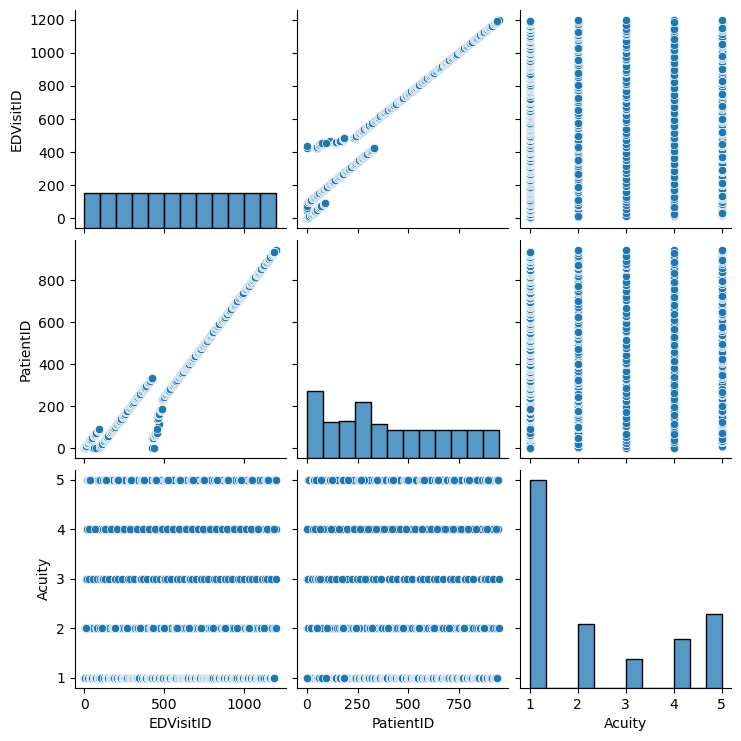

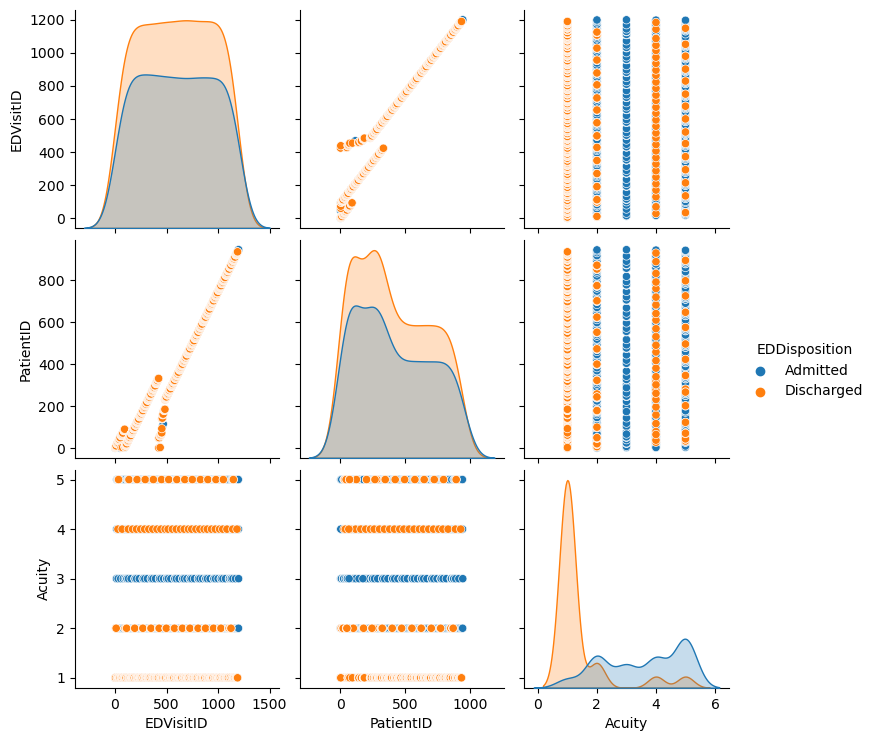

In [40]:
#3.Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.
#------------------------------------------------------------------------------------
import seaborn as sns
# Create the Ed disposition pairplot
sns.pairplot(df2)
sns.pairplot(df2,hue ="EDDisposition")

In [ ]:
#4.Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.  (Attach screenshots for this question)
#------------------------------------------------------------------------------------------------------------------------------------------------------
import psycopg2
conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
   password="280814")
cursor = conn.cursor()
postgreSQL_select_Query = "select * from providers where providername like 'T%'"
cursor.execute(postgreSQL_select_Query)
print("Selecting rows from providers table using cursor.fetchall")
providers_records = cursor.fetchall()

print("Printing each row and it's columns values")
for row in providers_records:
        print("Provider name = ", row[1])
        #print("Model = ", row[1])
        #print("Price  = ", row[2], "\n")    

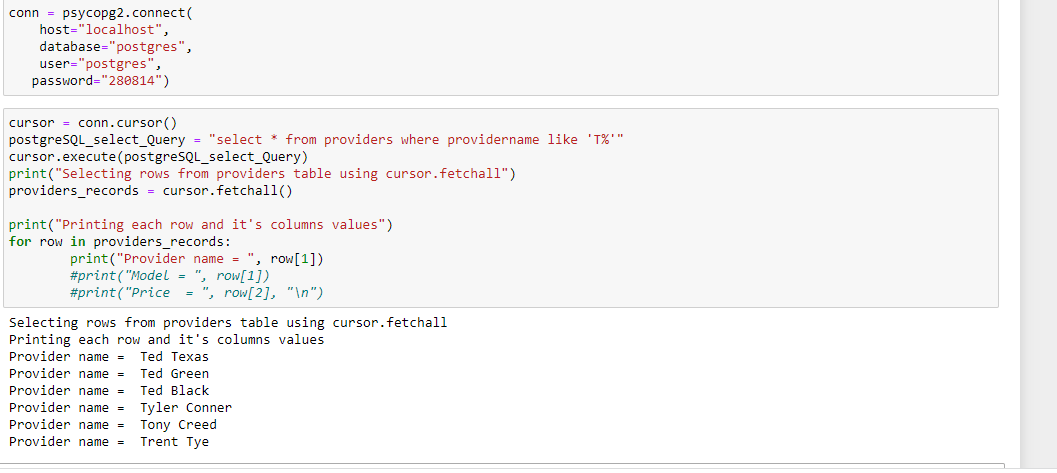

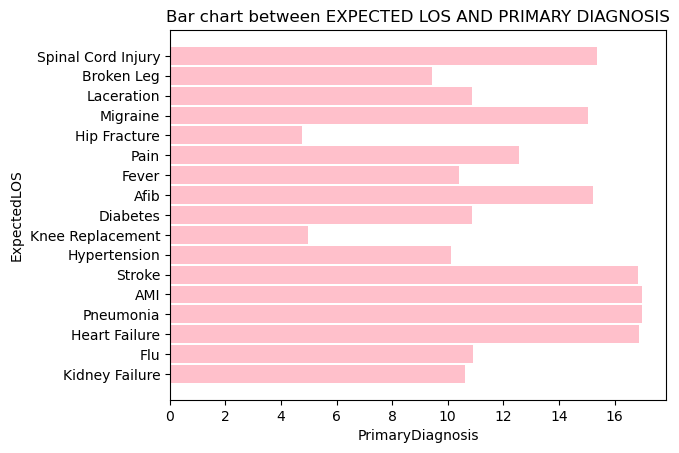

In [61]:
#5.Create a bar chart between expectedLOS & Primary diagnosis.
#--------------------------------------------------------------
import matplotlib.pyplot as plt
y_axis = df4.loc[: , "ExpectedLOS"]
x_axis = df4["PrimaryDiagnosis"]
plt.barh(x_axis, y_axis,height=0.9,color=('pink'))
plt.title('Bar chart between EXPECTED LOS AND PRIMARY DIAGNOSIS')
plt.xlabel('PrimaryDiagnosis')
plt.ylabel('ExpectedLOS')
plt.show()

In [24]:
#6.Find the last name of the patients, by getting the first name from the user.
#--------------------------------------------------------------------------------
import string
fname=input("Input your First Name : ")
fname = string.capwords(fname)
df=df1.loc[df1['FirstName'] == fname,'LastName']
print(df)

Input your First Name : lanni
0         Sue
129    Angear
Name: LastName, dtype: object


In [75]:
#7.Find the list of patients whose ExpectedLOS is greater than the value given by the user.
#--------------------------------------------------------------------------------------------
ReAdmissionRegistry = df4.iloc[:,[1,7]]
Patients = df1.iloc[:,[0,1,2]]
(lenthofStay)= float(input("Enter the lenth of Stay : "))
noofPatients = len([i for i in ReAdmissionRegistry['ExpectedLOS'] if i > lenthofStay])
print("Number of Patient greater than" , lenthofStay , "is" , noofPatients)
print("PatientID","FirstName","LastName","ExpectedLOS")
for PatientID1, ExpectedLOS in ReAdmissionRegistry.itertuples(index=False):
     if ExpectedLOS > lenthofStay:
        for PatientID2, FirstName, LastName in Patients.itertuples(index=False):
            if PatientID2 == PatientID1:
                        print(PatientID2,FirstName,LastName,ExpectedLOS)

Enter the lenth of Stay : 16
Number of Patient greater than 16.0 is 21
PatientID FirstName LastName ExpectedLOS
8 Alexandra Green 16.472256927259497
90 Cilka Alden 16.161805620328312
95 Abey Philipsson 16.83891828595611
134 Borer Stonehewer 16.22512602988089
215 Whitby Group 16.998213188933306
259 Mayert MacGettigen 16.30698316948985
302 Johann LLC 16.18918611446958
338 Scottie Phetteplace 16.753521233008957
351 Derk Garbutt 16.784041971729216
352 Evanne Woodford 16.989907376726443
355 Vitoria Cleaton 16.15437045083616
365 Johannes O'Daly 16.032984636363043
438 Daryl Buttriss 16.9748235974245
490 Angel Brandone 16.85193698107185
496 Lilyan Alekseev 16.65543023801477
560 Robyn Aucourte 16.78592551617726
587 Johnathan Philo 16.12251502209987
597 Oralle Applin 16.45626610650337
646 Andree Elliott 16.272193335768648
652 Megen Inc 16.62752132832736
663 Robyn Colborn 16.86788287978207


In [35]:
#8.Using Sunburst chart display the providers name by thier provider speciality, considering thier experience.
#--------------------------------------------------------------------------------------------------------------
import plotly.express as px
from datetime import date, datetime
# This function converts given date to experience
def experience(datejoin):
    today = date.today() 
    return today.year - datejoin.year - ((today.month,
                                      today.day) < (datejoin.month,
                                                    datejoin.day))
df6['Provider Experience'] = df6['ProviderDateOnStaff'].apply(experience)
df6
df = df6
px.sunburst(df, path=['ProviderSpecialty','ProviderName'], values='Provider Experience', color='Provider Experience', color_continuous_scale='agsunset')

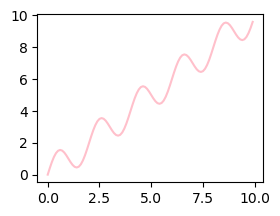

In [78]:
#9.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.
#----------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
plt.subplot(2, 2,1)
plt.plot(x,y,color=('pink'))
plt.show()

In [8]:
#10.Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).
#------------------------------------------------------------------------------------------------------
df2.groupby(["ReasonForVisit","EDDisposition"])["PatientID"].count().unstack(level=-1)

EDDisposition,Admitted,Discharged
ReasonForVisit,,
Accident,39.0,NaN
Bleeding,16.0,15.0
Car Accident,17.0,NaN
Chest Pain,94.0,15.0
Cough,NaN,1.0
Fever,46.0,188.0
Gun Shot,16.0,NaN
Intoxication,NaN,30.0
Laceration,NaN,30.0


In [62]:
#11.Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.
#--------------------------------------------------------------------------------------------------------------------------
df = pd.DataFrame()
df['time'] = df4["DischargeDate"]
# Extract features - year, month, day, hour, and minute
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df.head(720)

,time,year,month,day,hour,minute
0,2018-01-04 19:59:31.391,2018,1,4,19,59
1,2018-01-04 21:28:51.898,2018,1,4,21,28
2,2018-01-04 22:28:23.672,2018,1,4,22,28
3,2018-01-05 05:47:04.933,2018,1,5,5,47
4,2018-01-05 14:18:30.029,2018,1,5,14,18
...,...,...,...,...,...,...
715,2018-03-07 21:22:10.061,2018,3,7,21,22
716,2018-03-08 02:43:18.749,2018,3,8,2,43
717,2018-03-08 09:27:18.377,2018,3,8,9,27
718,2018-03-10 06:06:12.068,2018,3,10,6,6


In [49]:
#12.Create a visualization on the count of patients based on primary diagnosis.
#-------------------------------------------------------------------------------
df=df4
groupbydiagnosis=df.groupby('PrimaryDiagnosis')['PatientID'].nunique().reset_index(name='countofpatients').sort_values('countofpatients')
fig = px.bar(groupbydiagnosis, x='PrimaryDiagnosis', y='countofpatients',
             hover_data=['countofpatients', 'PrimaryDiagnosis'], color=('countofpatients'),
             labels={'primd':'PrimaryDiagnosis'}, height=600)

fig.show()

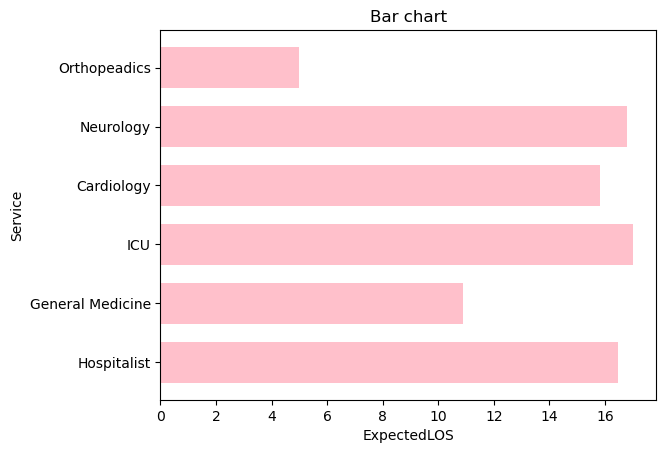

In [68]:
#13.Create a bar chart on service & expected length of stay.
#-----------------------------------------------------------
import matplotlib.pyplot as plt
y_axis = df4.loc[: , "ExpectedLOS"]
x_axis = df4["Service"]
plt.barh(x_axis, y_axis,height=0.7,color=('pink'))
plt.title('Bar chart')
plt.xlabel('ExpectedLOS')
plt.ylabel('Service')
plt.show()

In [30]:
#14.Find the count of Spanish Speaking patients.
#-----------------------------------------------
df=len(df1[df1["Language"]=='Spanish'])
print('The number of Spanish Speaking patient:',df)

The number of Spanish Speaking patient: 110


In [55]:
#15.Create a boxplot on ExpectedLOS by taking service into account.
#-------------------------------------------------------------------
fig = px.box(x=df4["Service"], y=df4["ExpectedLOS"])
fig.show()

In [87]:
#16.Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).
#-----------------------------------------------------------------------------------------------------------
df6 = df6.groupby('ProviderSpecialty')['ProviderName'].apply(list).reset_index(name='ProviderName')
print(df6)

  ProviderSpecialty                                       ProviderName
0        Cardiology  [[Kent Kendall, Ryan Kevin, Tyler Conner, Bail...
1        Pediatrics  [[Sally Sue, Mike Myers, Jordan Michael, Ted T...
2       PrimaryCare  [[Justin Time, Mike Joseph, Bridget Brenda, Br...
3           Surgery  [[Fred Man, Kim Kimberly, Sarah Ab, Abigail Ma...


In [ ]:
#17.Connect to sql and write a query to get Ambulatory visit record's year. (Attach screenshots for this question).
#------------------------------------------------------------------------------------------------------------------
cursor = conn.cursor()
postgreSQL_select_Query = "SELECT DATE_PART('YEAR', datescheduled) AS visit_year,COUNT(visitid) AS count FROM av GROUP BY DATE_PART('YEAR', datescheduled);"
cursor.execute(postgreSQL_select_Query)
print("Selecting rows from ambulatory visits scheduled table using cursor.fetchall")
av_records = cursor.fetchall()

print("Printing each row and it's columns values")
for row in av_records:
        print("visityear = ", row[0])
        print("count = ", row[1])
        #print("Price  = ", row[2], "\n")

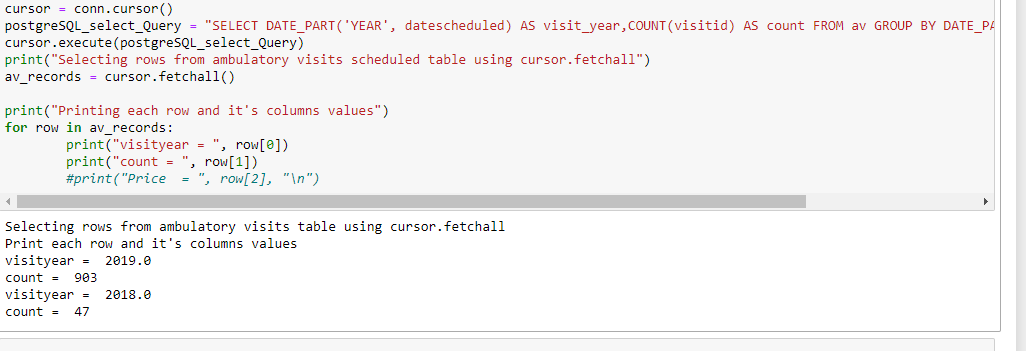

In [58]:
#18.Display using a donut chart the patient count in the ReAdmissionRegistry.
#------------------------------------------------------------------------------
import plotly.graph_objects as go
groupbydiagnosis=df4.groupby('PrimaryDiagnosis')['PatientID'].nunique().reset_index(name='countofpatients')
labels = df4["Service"]
values = groupbydiagnosis['countofpatients']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.show()

In [64]:
#19.Show the records where the ExpectedLos is greater than the difference between the max and min ExpectedLos.
#--------------------------------------------------------------------------------------------------------------
test = df5[(df5['ExpectedLOS'] > (max(df5["ExpectedLOS"])-min(df5["ExpectedLOS"])))]
print(test)

     AdmissionID  PatientID AdmissionDate           DischargeDate  \
12           398        134    2018-01-10 2018-01-15 16:43:47.026   
24           368        178    2018-01-14 2018-01-18 13:44:53.072   
31           369        198    2018-01-15 2018-01-31 14:28:07.437   
36           406        230    2018-01-18 2018-02-01 20:55:30.903   
47           174        352    2018-01-29 2018-02-02 21:21:45.388   
87           295        560    2018-02-13 2018-02-26 18:17:22.826   
92           297        588    2018-02-15 2018-02-26 14:46:54.780   
101          691        709    2018-02-21 2018-03-01 08:44:33.655   
110          549          8    2018-01-01 2018-01-07 15:39:25.987   
119          252         19    2018-01-01 2018-01-17 14:13:23.627   
127          550         27    2018-01-02 2018-01-13 07:34:46.603   
140          391         41    2018-01-03 2018-01-10 00:57:05.440   
157          609         59    2018-01-04 2018-01-09 01:18:34.182   
179          144         83    201

In [60]:
#20.Using a bar chart, which Service had the lowest count of Expected Mortality?
#--------------------------------------------------------------------------------
import plotly.express as px
groupbydiagnosis=df4.groupby('Service')['ExpectedMortality'].mean().reset_index(name='ExpectedMortality').sort_values('ExpectedMortality')
fig = px.bar(groupbydiagnosis, x='Service', y='ExpectedMortality',
             hover_data=['Service', 'ExpectedMortality'], color='Service',
             labels={'em':'ExpectedMortality'}, height=400)
fig.show()